## Result visualization

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [3]:
hepg2_df = pd.read_csv('./results/LR_mpra_HepG2_2B5_1000G.csv')
k562_df = pd.read_csv('./results/LR_mpra_K562_2B5_1000G.csv')
hepg2_df['Cell type'] = 'HepG2'
k562_df['Cell type'] = 'K562'
all_data_df = pd.concat([hepg2_df,k562_df])

## More Layer probing visulization

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
celltype = 'K562'
hepg2_df = pd.read_csv('./results/'+celltype+'_2B5_1000G_layersearch.csv')
linear_df = pd.read_csv('./results/LR_mpra_'+celltype+'_2B5_1000G.csv')
result_df = pd.merge(hepg2_df, linear_df, how='left', on='Layer')
for col in result_df.columns:
    if 'RR' in col:
        result_df.drop(col,axis=1,inplace=True)

performance = pd.melt(result_df,id_vars='Layer',var_name = 'Model',value_name='Pearson R' )



celltype = 'HepG2'
hepg2_df = pd.read_csv('./results/'+celltype+'_2B5_1000G_layersearch.csv')
linear_df = pd.read_csv('./results/LR_mpra_'+celltype+'_2B5_1000G.csv')
result_df = pd.merge(hepg2_df, linear_df, how='left', on='Layer')
for col in result_df.columns:
    if 'RR' in col:
        result_df.drop(col,axis=1,inplace=True)

performance2 = pd.melt(result_df,id_vars='Layer',var_name = 'Model',value_name='Pearson R' )


In [5]:
models = np.unique(performance.Model)

results = {}
for name in models:
    entry = performance[performance.Model == name]
    results[name] = np.array(entry['Pearson R'])
x = np.array(entry['Layer'])
results.keys()



results2 = {}
for name in models:
    entry = performance2[performance2.Model == name]
    results2[name] = np.array(entry['Pearson R'])
x = np.array(entry['Layer'])
results2.keys()


dict_keys(['CLS Linear Regression', 'CLS Ridge Regression', 'Embedding CNN', 'MLP with CLS', 'MLP with mean embed', 'Mean Embedding Linear Regression', 'Mean Embedding Ridge Regression'])

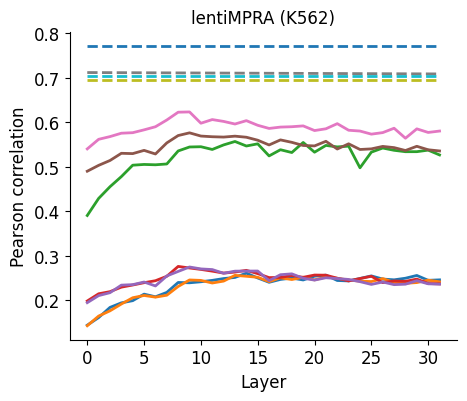

In [6]:
fontsize=12

fig, ax = plt.subplots(figsize=(5,4))
plt.plot(x, results['CLS Linear Regression'], linewidth=2)
plt.plot(x, results['CLS Ridge Regression'], linewidth=2)
plt.plot(x, results['MLP with CLS'], linewidth=2)

plt.plot(x, results['Mean Embedding Linear Regression'], linewidth=2)
plt.plot(x, results['Mean Embedding Ridge Regression'], linewidth=2)
plt.plot(x, results['MLP with mean embed'], linewidth=2)

plt.plot(x, results['Embedding CNN'], linewidth=2)

plt.plot([x[0],x[-1]], [0.7122, 0.7091],'--', linewidth=2)
#plt.text(33,0.725,'GPN Embedding')

plt.plot([x[0],x[-1]], [0.695, 0.695],'--', linewidth=2)
#plt.text(33,0.685,'MPRAnn')

plt.plot([x[0],x[-1]],[0.7036, 0.7036],'--', linewidth=2)
#plt.text(33,0.7036,'Onehot CNN')

plt.plot([x[0],x[-1]], [0.7725, 0.7725],'--', linewidth=2)
#plt.text(33,0.7725,'Onehot Residual')


legend_name = ['NT-CLS  (Linear)',
               'NT-CLS  (Ridge)',
               'NT-CLS  (MLP)',
               'NT-Mean (Linear)',
               'NT-Mean (Ridge)',
               'NT-Mean (MLP)',
               'NT-Embedding (CNN)',
               'GPN-Embedding (CNN)',
               'One-hot (MPRAnn)',
               'One-hot (CNN)',
               'One-hot (Residualbind)',
              ]

#plt.legend(legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Layer', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('lentiMPRA (K562)', fontsize=fontsize)
fig.savefig('lenti_k562.pdf', format='pdf', dpi=200, bbox_inches='tight')

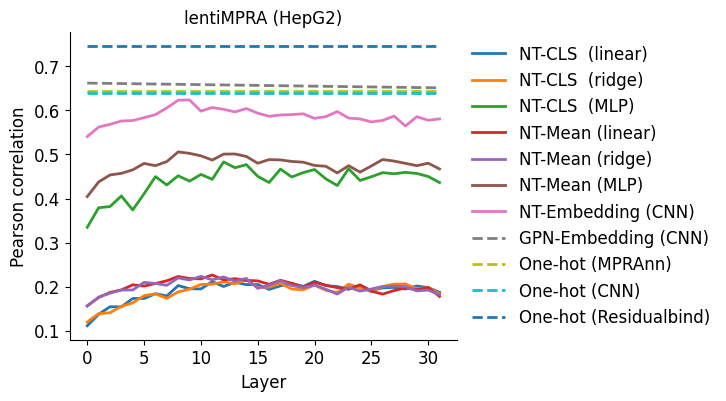

In [7]:

fig, ax = plt.subplots(figsize=(5,4))
plt.plot(x, results2['CLS Linear Regression'], linewidth=2)
plt.plot(x, results2['CLS Ridge Regression'], linewidth=2)
plt.plot(x, results2['MLP with CLS'], linewidth=2)

plt.plot(x, results2['Mean Embedding Linear Regression'], linewidth=2)
plt.plot(x, results2['Mean Embedding Ridge Regression'], linewidth=2)
plt.plot(x, results2['MLP with mean embed'], linewidth=2)

plt.plot(x, results['Embedding CNN'], linewidth=2)

plt.plot([x[0],x[-1]], [0.6619, 0.6511],'--', linewidth=2)
#plt.text(33,0.725,'GPN Embedding')

plt.plot([x[0],x[-1]], [0.644, 0.644],'--', linewidth=2)
#plt.text(33,0.685,'MPRAnn')

plt.plot([x[0],x[-1]],[0.64, 0.64],'--', linewidth=2)
#plt.text(33,0.7036,'Onehot CNN')

plt.plot([x[0],x[-1]], [0.7467, 0.7467],'--', linewidth=2)
#plt.text(33,0.7725,'Onehot Residual')



legend_name = ['NT-CLS  (linear)',
               'NT-CLS  (ridge)',
               'NT-CLS  (MLP)',
               'NT-Mean (linear)',
               'NT-Mean (ridge)',
               'NT-Mean (MLP)',
               'NT-Embedding (CNN)',
               'GPN-Embedding (CNN)',
               'One-hot (MPRAnn)',
               'One-hot (CNN)',
               'One-hot (Residualbind)',
              ]

plt.legend(legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Layer', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('lentiMPRA (HepG2)', fontsize=fontsize)
fig.savefig('lenti_hepg2.pdf', format='pdf', dpi=200, bbox_inches='tight')